<a href="https://colab.research.google.com/github/MatthiasYeoEeLiang/BT4012-Project/blob/main/Group18_BT4012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from matplotlib import pyplot as plt
import seaborn as sns

Exploratory Data Analysis

In [3]:
df = pd.read_csv("card_transdata.csv")
print(df)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

C:\Users\darvi\AppData\Local\Temp\ipykernel_13668\4224455992.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(round(df.corr(),2),


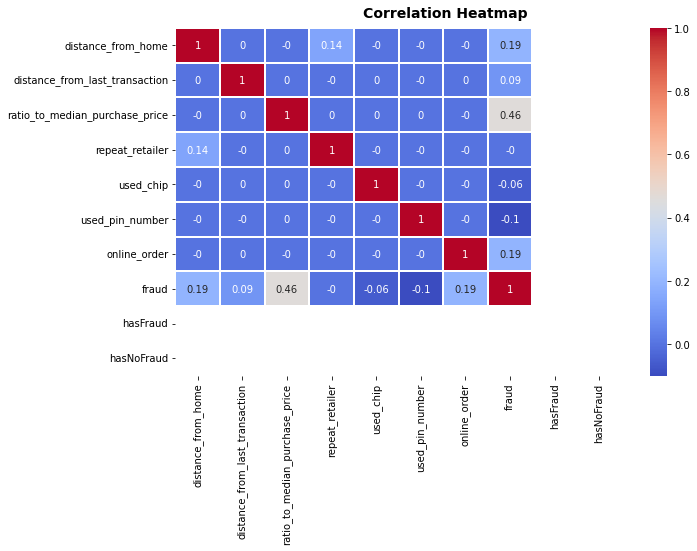

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(df.corr(),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap', fontsize=14, fontweight='bold')

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                   1000000
used_chip                         1000000
used_pin_number                   1000000
online_order                      1000000
fraud                             1000000
Amount group                      1000000
hasFraud                            87403
hasNoFraud                         912597
dtype: int64


[Text(0, 0, 'below 1'), Text(1, 0, 'above 1')]

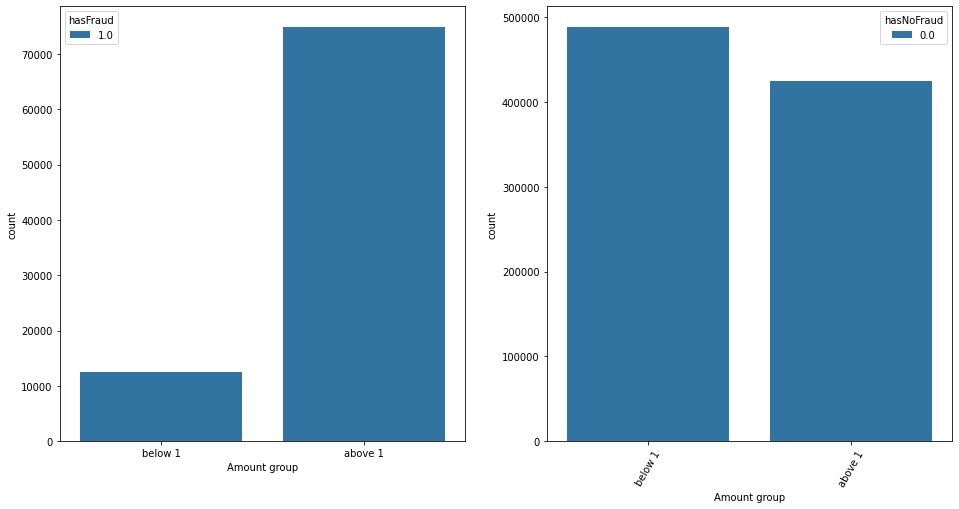

In [20]:
df['Amount group'] = pd.cut(df.ratio_to_median_purchase_price, bins=[0,1, 300], labels=['below 1', 'above 1'])
df['hasFraud'] = df.query('fraud == 1').fraud
df['hasNoFraud'] = df.query('fraud == 0').fraud
print(df.count('hasFraud' == 1 and 'Amount group' == 'below 1'))
f, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)
sns.countplot(x="Amount group", hue="hasFraud", data=df, ax=axes[0])
ax = sns.countplot(x="Amount group", hue="hasNoFraud", data=df, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)